2017-05-24 01:33:22,296 - extract - DEBUG - Opening file...
2017-05-24 01:33:22,303 - extract - DEBUG - Reached beginning of movie list
2017-05-24 01:33:25,069 - extract - DEBUG - Reached end of movie list
2017-05-24 01:33:25,070 - extract - INFO - Finised parsing ratings


Total number of movies with >=0 votes: 729034
Total number of votes for movies with >=0 votes: 730625940
Average number of votes for movies with >=0 votes: 1002.183629295753
Average rating (>=0 votes): 6.945003113709419
Total number of movies with >=1500 votes: 28610
Total number of votes for movies with >=1500 votes: 667325635
Average number of votes for movies with >=1500 votes: 23324.908598392172
Average rating (>=1500 votes): 6.899716882209051
Total number of movies with >=25000 votes: 4615
Total number of votes for movies with >=25000 votes: 539774807
Average number of votes for movies with >=25000 votes: 116960.95492957746
Average rating (>=25000 votes): 6.917053087757299


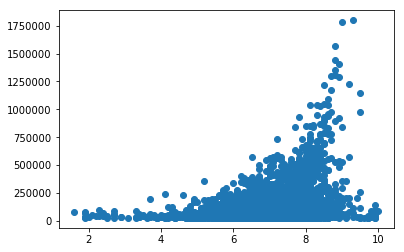

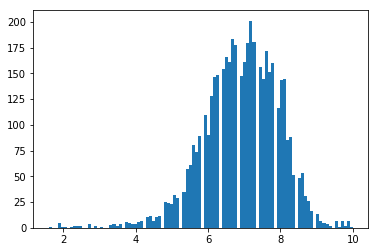

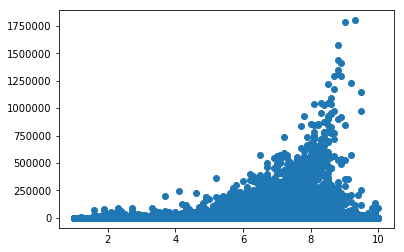

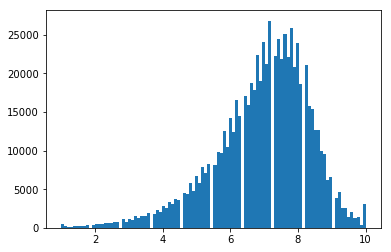

In [1]:
%matplotlib inline
import extract
import analyze
import logging
import matplotlib.pyplot as plt

# Setup Logging
logging.basicConfig(
    level=logging.DEBUG,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# First get the ratings
ratings = extract.get_ratings()

# Some basic analysis
analyze.print_avg_tot(ratings, 0)
analyze.print_avg_tot(ratings, 1500)
analyze.print_avg_tot(ratings, 25000)

restricted = analyze.get_sublist(ratings, 25000)
list = []
votes = []
rates = []
for movie in restricted:
    list.append((float(movie[1]), int(movie[0])))
    votes.append(int(movie[0]))
    rates.append(float(movie[1]))
    
plt.plot(rates, votes, 'o')
plt.show()
plt.hist(rates, bins=100)
plt.show()

list = []
votes = []
rates = []
for movie in ratings:
    list.append((float(movie[1]), int(movie[0])))
    votes.append(int(movie[0]))
    rates.append(float(movie[1]))
    
plt.plot(rates, votes, 'o')
plt.show()
plt.hist(rates, bins=100)
plt.show()

In [2]:
ratings[46500]

('1029', '9.0', '"Castle"', '2009', None, 'Time Will Tell (#6.5)')

In [3]:
ratings[365150]

('8', '7.8', 'Alone with Kelly Kay', '2005', None, None)

In [4]:
ratings[365100]

('5', '1.8', 'Alone', '2012', 'XV', None)